In [ ]:
import sqlite3

# Step 1: Connect to DB 
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 2: Create 'sales' table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Step 3: Insert sample data (optional: clear first if you re-run)
cursor.execute("DELETE FROM sales")  # clear old data
data = [
    ('Product A', 10, 20.0),
    ('Product B', 5, 15.0),
    ('Product A', 7, 20.0),
    ('Product C', 3, 30.0),
    ('Product B', 2, 15.0),
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)

# Step 4: Commit & close
conn.commit()
conn.close()

print("✅ Database and table created, data inserted.")


✅ Database and table created, data inserted.


Sales Summary:
     product  total_qty  revenue
0  Product A         17    340.0
1  Product B          7    105.0
2  Product C          3     90.0


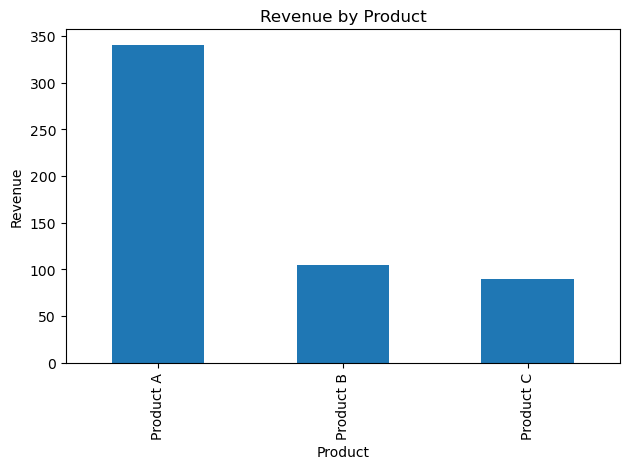

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the existing database
conn = sqlite3.connect("sales_data.db")

# Query to summarize sales
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load into pandas
df = pd.read_sql_query(query, conn)
conn.close()

# Print the results
print("Sales Summary:")
print(df)

# Plot revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
